In [2]:
import pandas as pd
data_train = pd.read_csv('sarcasm_tam_train.csv')
data_val = pd.read_csv('sarcasm_tam_dev.csv')
data_test = pd.read_csv('sarcasm_tam_test.csv')

In [3]:
text_train = data_train['Text']
text_val = data_val['Text']
text_test = data_test['Text']

class_label_train = data_train['labels']
class_label_val = data_val['labels']
class_label_test = data_test['labels']

In [4]:
class_label_train.value_counts(), class_label_val.value_counts()

(labels
 Non-sarcastic    21740
 Sarcastic         7830
 Name: count, dtype: int64,
 labels
 Non-sarcastic    4630
 Sarcastic        1706
 Name: count, dtype: int64)

In [5]:
import numpy as np
classes_list = ["Non-sarcastic", "Sarcastic"]
label_index_train = class_label_train.apply(classes_list.index)
label_index_val = class_label_val.apply(classes_list.index)
label_index_test = class_label_test.apply(classes_list.index)

In [6]:
import numpy as np
import ktrain
from ktrain import text

In [7]:
# MODEL_NAME = 'distilbert-base-multilingual-cased'
MODEL_NAME = 'google-bert/bert-base-multilingual-cased'
t = text.Transformer(MODEL_NAME, maxlen=30, classes=classes_list)
trn = t.preprocess_train(np.array(text_train), np.array(class_label_train))
val = t.preprocess_test(np.array(text_val), np.array(class_label_val))
model = t.get_classifier()
learner = ktrain.get_learner(model, train_data=trn, val_data=val, batch_size=32)

c:\Users\nimmi\anaconda3\Lib\site-packages\ktrain\text\preprocessor.py:382: UserWarning: The class_names argument is replacing the classes argument. Please update your code.
  warnings.warn(


preprocessing train...
language: ta
train sequence lengths:
	mean : 10
	95percentile : 23
	99percentile : 43


c:\Users\nimmi\anaconda3\Lib\site-packages\ktrain\utils.py:744: UserWarning: class_names argument was ignored, as they were extracted from string labels in dataset
  warnings.warn(


Is Multi-Label? False
preprocessing test...
language: ta
test sequence lengths:
	mean : 10
	95percentile : 21
	99percentile : 41


In [7]:
# from tensorflow.keras.callbacks import ModelCheckpoint
# filepath = "tamil_googlebert"

# checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
# callbacks_list = [checkpoint]

In [8]:
# learner.fit_onecycle(5e-5, 8, verbose=2, callbacks=callbacks_list)



begin training using onecycle policy with max lr of 5e-05...
Epoch 1/8

Epoch 1: val_accuracy improved from -inf to 0.76547, saving model to tamil_googlebert
925/925 - 8245s - loss: 0.5097 - accuracy: 0.7425 - val_loss: 0.4635 - val_accuracy: 0.7655 - 8245s/epoch - 9s/step
Epoch 2/8

Epoch 2: val_accuracy improved from 0.76547 to 0.79908, saving model to tamil_googlebert
925/925 - 8528s - loss: 0.4331 - accuracy: 0.7905 - val_loss: 0.4263 - val_accuracy: 0.7991 - 8528s/epoch - 9s/step
Epoch 3/8

Epoch 3: val_accuracy did not improve from 0.79908
925/925 - 7408s - loss: 0.3809 - accuracy: 0.8238 - val_loss: 0.4360 - val_accuracy: 0.7885 - 7408s/epoch - 8s/step
Epoch 4/8

Epoch 4: val_accuracy did not improve from 0.79908
925/925 - 8065s - loss: 0.3304 - accuracy: 0.8568 - val_loss: 0.4631 - val_accuracy: 0.7923 - 8065s/epoch - 9s/step
Epoch 5/8

Epoch 5: val_accuracy did not improve from 0.79908
925/925 - 8013s - loss: 0.2508 - accuracy: 0.8994 - val_loss: 0.5243 - val_accuracy: 0.792

In [8]:
# learner.fit_onecycle(5e-5, 10) 



begin training using onecycle policy with max lr of 5e-05...
Epoch 1/10
925/925 [==============================] - 18014s 19s/step - loss: 0.5059 - accuracy: 0.7464 - val_loss: 0.4556 - val_accuracy: 0.7737
Epoch 2/10
925/925 [==============================] - 9043s 10s/step - loss: 0.4333 - accuracy: 0.7896 - val_loss: 0.4448 - val_accuracy: 0.7693
Epoch 3/10
925/925 [==============================] - 5201s 6s/step - loss: 0.3748 - accuracy: 0.8294 - val_loss: 0.4439 - val_accuracy: 0.7921
Epoch 4/10
925/925 [==============================] - 4280s 5s/step - loss: 0.3201 - accuracy: 0.8614 - val_loss: 0.4710 - val_accuracy: 0.7907
Epoch 5/10
925/925 [==============================] - 4577s 5s/step - loss: 0.2560 - accuracy: 0.8971 - val_loss: 0.5021 - val_accuracy: 0.7850
Epoch 6/10
925/925 [==============================] - 4136s 4s/step - loss: 0.1980 - accuracy: 0.9241 - val_loss: 0.5388 - val_accuracy: 0.7943
Epoch 7/10
925/925 [==============================] - 4261s 5s/step - 

In [9]:
# learner.validate(class_names=t.get_classes()) 

198/198 [==============================] - 219s 1s/step
               precision    recall  f1-score   support

Non-sarcastic       0.84      0.90      0.87      4630
    Sarcastic       0.65      0.52      0.58      1706

     accuracy                           0.80      6336
    macro avg       0.74      0.71      0.72      6336
 weighted avg       0.79      0.80      0.79      6336



array([[4153,  477],
       [ 817,  889]], dtype=int64)

In [8]:
filepath = "tamil_googlebert"
model.load_weights(filepath)
learner.validate(class_names=t.get_classes())
predictor = ktrain.get_predictor(learner.model, preproc=t)
predict = predictor.predict(text_test.values)

198/198 [==============================] - 298s 1s/step
               precision    recall  f1-score   support

Non-sarcastic       0.83      0.91      0.87      4630
    Sarcastic       0.67      0.50      0.57      1706

     accuracy                           0.80      6336
    macro avg       0.75      0.70      0.72      6336
 weighted avg       0.79      0.80      0.79      6336



In [9]:
from keras.utils import to_categorical
predicted_prob = predictor.predict_proba(text_test.values)
label_test = to_categorical(np.asarray(label_index_test))

In [10]:
from sklearn.metrics import classification_report 
print(classification_report(label_index_test ,predicted_prob.argmax(axis = 1), target_names=predictor.get_classes()))

               precision    recall  f1-score   support

Non-sarcastic       0.83      0.90      0.86      4621
    Sarcastic       0.65      0.50      0.56      1717

     accuracy                           0.79      6338
    macro avg       0.74      0.70      0.71      6338
 weighted avg       0.78      0.79      0.78      6338



In [11]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp

def plot_AUC_ROC(y_true, y_pred):
    n_classes = 2

    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_true[:, i], y_pred[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_true.ravel(), y_pred.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
############################################################################################
    lw = 2
    # Compute macro-average ROC curve and ROC area

    # First aggregate all false positive rates
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

    # Then interpolate all ROC curves at this points
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += interp(all_fpr, fpr[i], tpr[i])

    # Finally average it and compute AUC
    mean_tpr /= n_classes

    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    # Plot all ROC curves
    plt.figure()

    plt.plot(fpr["micro"], tpr["micro"],
            label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
            color='deeppink', linestyle=':', linewidth=4)

    plt.plot(fpr["macro"], tpr["macro"],
            label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
            color='navy', linestyle=':', linewidth=4)

    colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
    #classes_list1 = ["DE","NE","DK"]
    classes_list1 = predictor.get_classes()
    for i, color,c in zip(range(n_classes), colors,classes_list1):
        plt.plot(fpr[i], tpr[i], color=color, lw=lw,
                label='{0} (AUC = {1:0.2f})'
                ''.format(c, roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--', lw=lw)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic curve')
    plt.legend(loc="lower right")

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import itertools
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j],fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

[[4162  459]
 [ 866  851]]
Normalized confusion matrix
[[0.90067085 0.09932915]
 [0.50436808 0.49563192]]


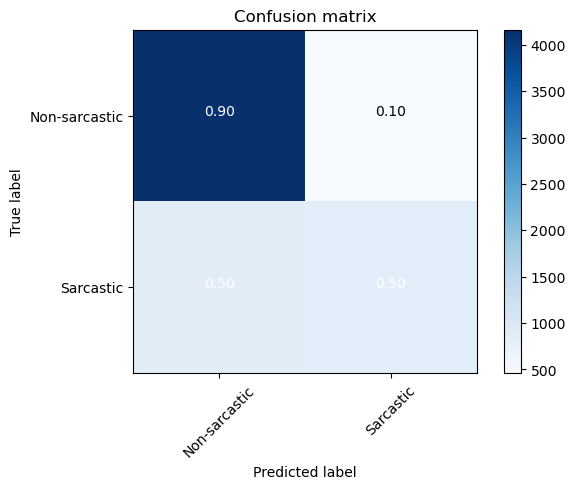

C:\Users\nimmi\AppData\Local\Temp\ipykernel_20984\1043266180.py:36: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


<Figure size 640x480 with 0 Axes>

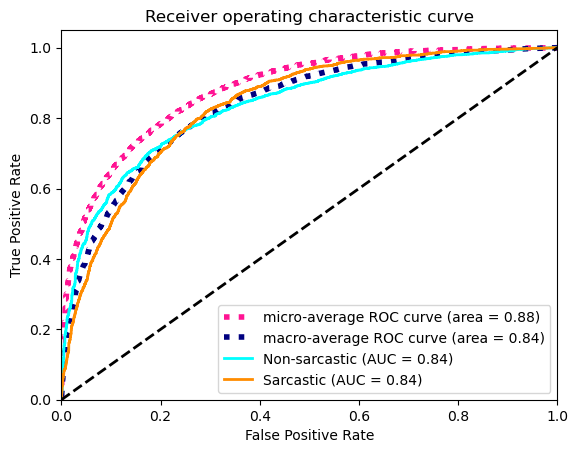

In [13]:
from sklearn import metrics
plt.clf()
cnf_matrix = metrics.confusion_matrix(label_index_test, predicted_prob.argmax(axis = 1))
print(cnf_matrix)
plot_confusion_matrix(cnf_matrix, classes = predictor.get_classes(), normalize = True)
plt.show()

plt.clf()
plot_AUC_ROC(label_test, predicted_prob)
plt.savefig("ROC_AUC_googlebert_tam.pdf", format = 'pdf', dpi =1000)


In [14]:
y_pred = predicted_prob.argmax(axis = 1)
from sklearn.metrics import precision_recall_fscore_support, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
# Calculate precision, recall, F1 score
precision, recall, f1, _ = precision_recall_fscore_support(label_index_test, y_pred, average='weighted')
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Precision: 0.7795037073808079
Recall: 0.7909435153045125
F1 Score: 0.7812980650389596


In [ ]:
plt.clf()
cnf_matrix = metrics.confusion_matrix(label_index_test, predicted_prob.argmax(axis = 1))
print(cnf_matrix)
plot_confusion_matrix(cnf_matrix, classes = predictor.get_classes(), normalize = True)
plt.show()

[[4162  459]
 [ 866  851]]


<Figure size 640x480 with 0 Axes>

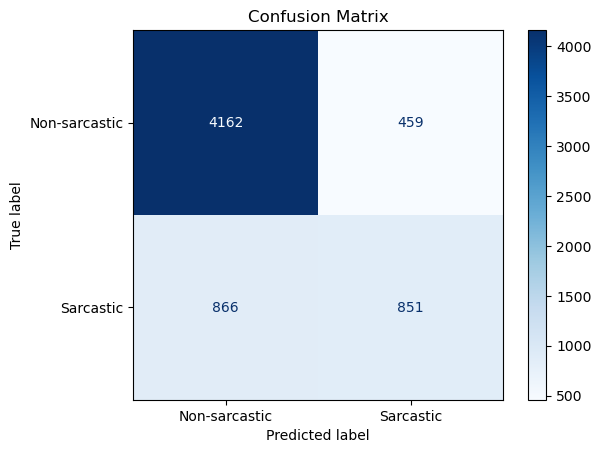

<Figure size 640x480 with 0 Axes>

In [16]:
from sklearn.metrics import ConfusionMatrixDisplay
plt.clf()
cm = confusion_matrix(class_label_test, predict)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes_list)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
print(cm)
plt.show()
plt.savefig("confusion_googlebert_tam.pdf", format = 'pdf', dpi =1000)